# Template matching is an essential application of pattern recognition that has numerous real-world applications. In this assignment, you are tasked to develop a Template matching system using Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) in Python.


## Part 1: Preprocessing of the dataset

#### 1.1. Collect your own dataset of images. For example face dataset of Bollywood celebrity faces, family member faces or digit database, alphabet database, fruit database etc.

#### 1.2. It should have atleast 10 classes and 5 images per class.( For example in case of face dataset each person is one class).

#### 1.3. Divide your database into two parts -Training and Test . where first 3 images of each class goes training and last 2 for testing.

#### 1.4. Preprocess the dataset if needed by applying normalization, resizing, and gray-scaling of images.

#### 1.5. Split the dataset into training and testing sets.



In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to load images from subfolders within a folder
def load_images_from_subfolders(folder):
    images_per_class = []
    labels = []
    for class_folder in os.listdir(folder):
        class_images = []
        class_path = os.path.join(folder, class_folder)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                img = Image.open(img_path)
                if img is not None:
                    class_images.append(img)
            images_per_class.append(class_images)
            labels.append(class_folder)  # Assuming folder names are the class labels
    return images_per_class, labels

# Specify the path to your dataset folder
dataset_folder = "/content/drive/MyDrive/bollyn/bollyn/Training"

# Load images from subfolders within the dataset folder
images, labels = load_images_from_subfolders(dataset_folder)

# Ensure at least 10 classes with 5 images per class
assert len(images) >= 10, "At least 10 classes are required"
for class_images in images:
    assert len(class_images) >= 5, "At least 5 images per class are required"

# Divide your database into training and test sets
train_images = [class_images[:3] for class_images in images]
test_images = [class_images[3:] for class_images in images]

# Preprocess the dataset if needed
# For example, resizing, normalization, and grayscale conversion

# Function to preprocess images
def preprocess_images(images, size=(100, 100)):
    processed_images = []
    for class_images in images:
        processed_class_images = []
        for img in class_images:
            img = img.resize(size)
            img = img.convert("L")  # Convert to grayscale
            img = np.array(img) / 255.0  # Normalization
            processed_class_images.append(img)
        processed_images.append(processed_class_images)
    return processed_images

train_images_preprocessed = preprocess_images(train_images)
test_images_preprocessed = preprocess_images(test_images)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = [], [], [], []
for i, class_images in enumerate(train_images_preprocessed):
    X_train.extend(class_images)
    y_train.extend([i] * len(class_images))
for i, class_images in enumerate(test_images_preprocessed):
    X_test.extend(class_images)
    y_test.extend([i] * len(class_images))

# Convert to numpy arrays
X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)

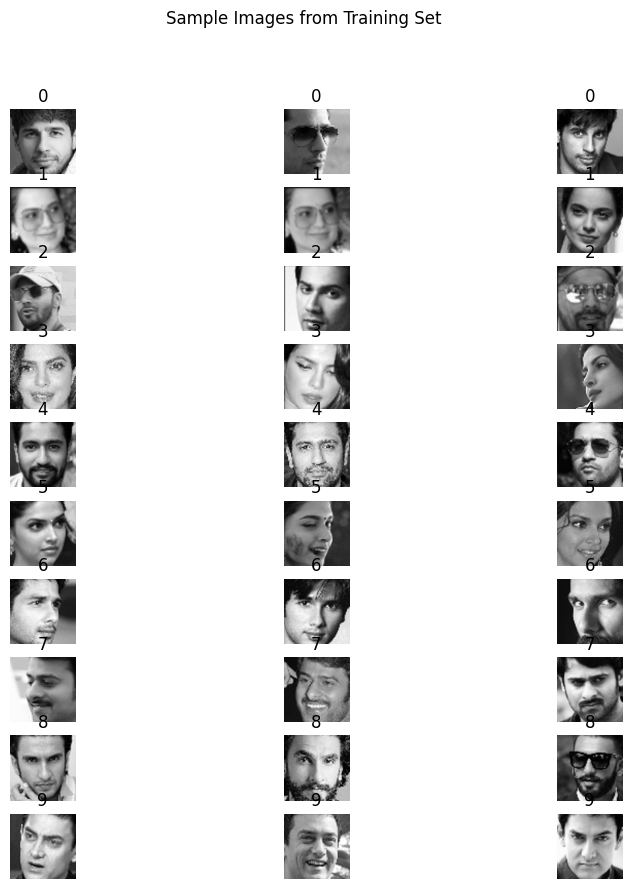

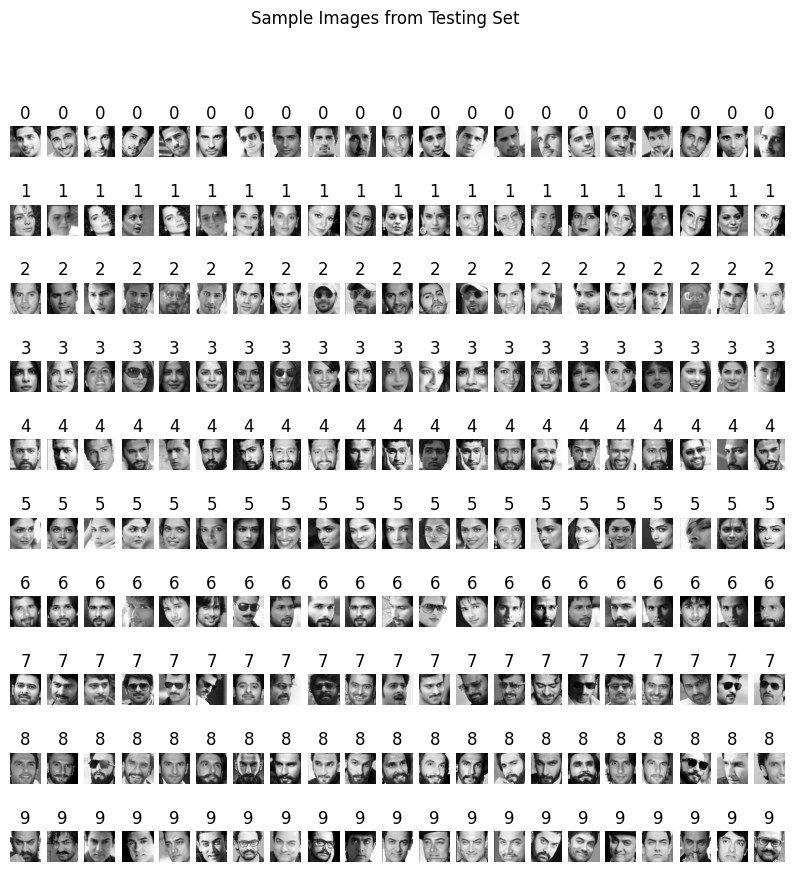

In [ ]:
import matplotlib.pyplot as plt

# Function to display sample images
def display_sample_images(images, labels, title):
    fig, axes = plt.subplots(nrows=len(images), ncols=len(images[0]), figsize=(10, 10))
    fig.suptitle(title)
    for i in range(len(images)):
        for j in range(len(images[i])):
            axes[i, j].imshow(images[i][j], cmap='gray')
            axes[i, j].set_title(labels[i])
            axes[i, j].axis('off')
    plt.show()

# Display sample images from the split training set
display_sample_images(train_images_preprocessed, [label for label in range(len(train_images_preprocessed))], title="Sample Images from Training Set")

# Display sample images from the split testing set
display_sample_images(test_images_preprocessed, [label for label in range(len(test_images_preprocessed))], title="Sample Images from Testing Set")


## Part 2: PCA implementation (3 points)

#### 2.1. Implement PCA to reduce the dimensionality of the image dataset.

In [ ]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA

# Function to load images from folders
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

# Paths to training and testing folders
train_folder = '/content/drive/MyDrive/bollyn/bollyn/Training'
test_folder = '/content/drive/MyDrive/bollyn/bollyn/testing'

# Load images from training and testing folders
X_train_images = []
y_train = []
X_test_images = []
y_test = []

for celebrity_folder in os.listdir(train_folder):
    celebrity_images = load_images_from_folder(os.path.join(train_folder, celebrity_folder))
    X_train_images.extend(celebrity_images[:3])  # Use the first 3 images for training
    y_train.extend([celebrity_folder] * len(celebrity_images[:3]))

for celebrity_folder in os.listdir(test_folder):
    celebrity_images = load_images_from_folder(os.path.join(test_folder, celebrity_folder))
    X_test_images.extend(celebrity_images[3:])  # Use the last 2 images for testing
    y_test.extend([celebrity_folder] * len(celebrity_images[3:]))

# Convert images to numpy arrays
X_train = np.array(X_train_images)
X_test = np.array(X_test_images)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Flatten the images into 1D arrays
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Number of principal components
n_components = min(X_train_flattened.shape[0], X_train_flattened.shape[1])

# Apply PCA
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_flattened)
X_test_pca = pca.transform(X_test_flattened)


#### 2.2. Analyze the effect of varying the number of principal components on the performance of the Template matching system.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Function to evaluate KNN classifier with varying number of principal components
def evaluate_knn(X_train, X_test, y_train, y_test, n_components_list):
    accuracies = []
    for n_components in n_components_list:
        # Apply PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train KNN classifier
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_pca, y_train)

        # Predict and calculate accuracy
        y_pred = knn.predict(X_test_pca)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    return accuracies

# Vary the number of principal components
n_components_list = [10, 30]  # Example list of numbers of principal components

# Evaluate KNN classifier with varying number of principal components
accuracies = evaluate_knn(X_train_flattened, X_test_flattened, y_train, y_test, n_components_list)

# Print accuracies
for i, n_components in enumerate(n_components_list):
    print(f"Accuracy with {n_components} principal components: {accuracies[i]}")


Accuracy with 10 principal components: 0.12244897959183673
Accuracy with 30 principal components: 0.12244897959183673


#### 2.3. Visualize the first n (n=10, 50, 100) principal components.

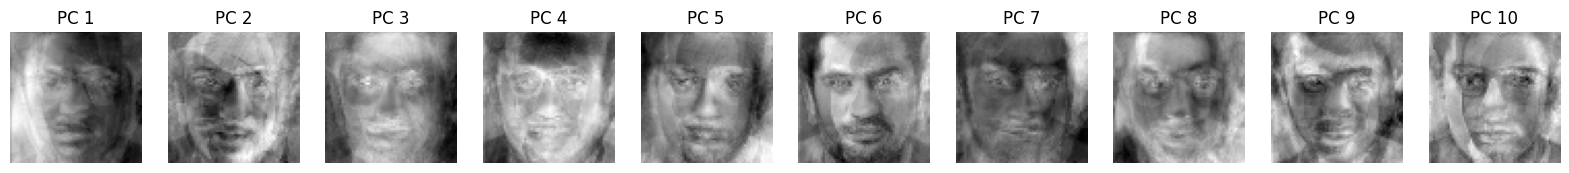

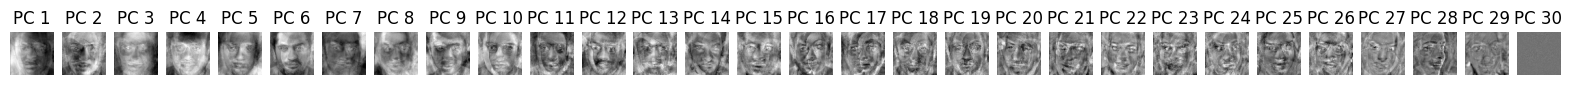

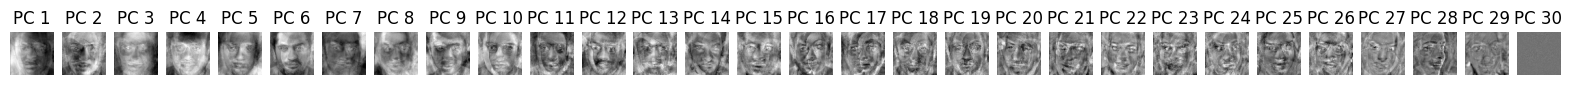

In [ ]:
def visualize_principal_components(pca, n_components):
    fig, axes = plt.subplots(nrows=1, ncols=min(n_components, pca.components_.shape[0]), figsize=(20, 4))
    for i in range(min(n_components, pca.components_.shape[0])):
        axes[i].imshow(pca.components_[i].reshape(64, 64), cmap='gray')
        axes[i].set_title(f'PC {i+1}')
        axes[i].axis('off')
    plt.show()

# Visualize the first n principal components
n_components_list = [10, 50, 100]
for n_components in n_components_list:
    visualize_principal_components(pca, n_components)


## Part 3: LDA implementation (3 points)

#### 3.1. Implement LDA to extract discriminative features from the reduced dataset.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Apply LDA
lda = LDA()
X_train_lda = lda.fit_transform(X_train_pca, y_train)
X_test_lda = lda.transform(X_test_pca)


#### 3.2. Analyze the effect of varying the number of discriminant features on the performance of the Template matching system.


In [ ]:
# Function to evaluate KNN classifier with varying number of discriminant features
def evaluate_knn_lda(X_train, X_test, y_train, y_test, n_features_list):
    accuracies = []
    for n_features in n_features_list:
        # Select the first n_features discriminant features
        X_train_lda_subset = X_train[:, :n_features]
        X_test_lda_subset = X_test[:, :n_features]

        # Train KNN classifier
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_lda_subset, y_train)

        # Predict and calculate accuracy
        y_pred = knn.predict(X_test_lda_subset)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    return accuracies

# Vary the number of discriminant features
n_features_list = [10, 30, 50]  # Example list of numbers of discriminant features

# Evaluate KNN classifier with varying number of discriminant features
accuracies_lda = evaluate_knn_lda(X_train_lda, X_test_lda, y_train, y_test, n_features_list)

# Print accuracies
for i, n_features in enumerate(n_features_list):
    print(f"Accuracy with {n_features} discriminant features: {accuracies_lda[i]}")


Accuracy with 10 discriminant features: 0.1326530612244898
Accuracy with 30 discriminant features: 0.1326530612244898
Accuracy with 50 discriminant features: 0.1326530612244898


#### 3.3. Visualize the first n(n = any number) discriminant features.

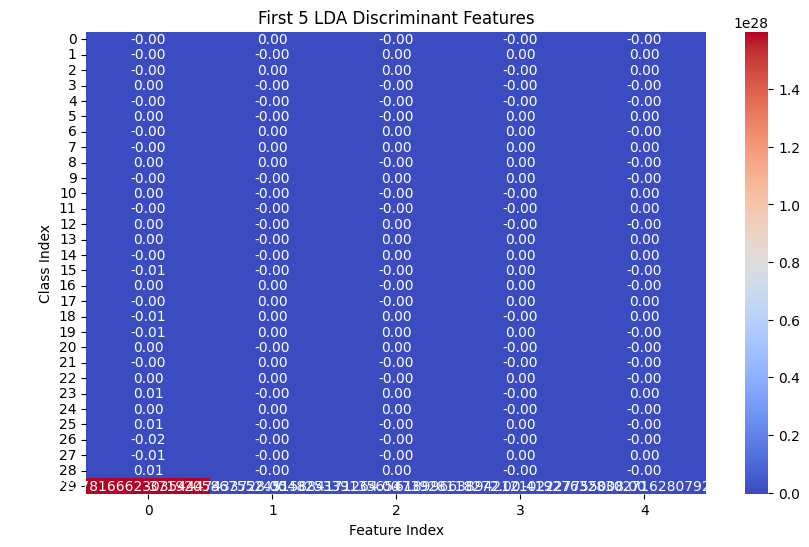

In [ ]:
import seaborn as sns

# Function to visualize the first n discriminant features
def visualize_discriminant_features(lda, n_features):
    fig, axes = plt.subplots(figsize=(10, 6))
    sns.heatmap(lda.scalings_[:, :n_features], cmap='coolwarm', ax=axes, annot=True, fmt=".2f")
    axes.set_title(f'First {n_features} LDA Discriminant Features')
    plt.xlabel('Feature Index')
    plt.ylabel('Class Index')
    plt.show()

# Visualize the first n discriminant features
n_features_to_visualize = 5  # Example number of discriminant features to visualize
visualize_discriminant_features(lda, n_features_to_visualize)


## Part 4: Template matching system development

#### 4.1. Build a Template matching system using the reduced dataset and extracted features by any machine learning algorithm (e.g., nearest neighbor, SVM).


##### a. using PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN classifier using PCA features
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)


KNeighborsClassifier()

##### b. using LDA

In [ ]:
# Build a KNN classifier using LDA features
knn_lda = KNeighborsClassifier(n_neighbors=5)
knn_lda.fit(X_train_lda, y_train)


KNeighborsClassifier()

#### 4.2. Evaluate the performance of the Template matching system using metrics such as accuracy, precision, recall, and F1 score.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate the performance of the Template matching system
def evaluate_performance(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate the performance of the PCA-based Template matching system
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca, precision_pca, recall_pca, f1_pca = evaluate_performance(y_test, y_pred_pca)

# Evaluate the performance of the LDA-based Template matching system
y_pred_lda = knn_lda.predict(X_test_lda)
accuracy_lda, precision_lda, recall_lda, f1_lda = evaluate_performance(y_test, y_pred_lda)

# Print evaluation metrics for both PCA and LDA
print("PCA-based Template Matching System:")
print("Accuracy:", accuracy_pca)
print("Precision:", precision_pca)
print("Recall:", recall_pca)
print("F1 Score:", f1_pca)
print()
print("LDA-based Template Matching System:")
print("Accuracy:", accuracy_lda)
print("Precision:", precision_lda)
print("Recall:", recall_lda)
print("F1 Score:", f1_lda)


PCA-based Template Matching System:
Accuracy: 0.12244897959183673
Precision: 0.09260204081632652
Recall: 0.12244897959183673
F1 Score: 0.09899137144035103

LDA-based Template Matching System:
Accuracy: 0.1326530612244898
Precision: 0.01759683465222824
Recall: 0.1326530612244898
F1 Score: 0.031071888214745356


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Part 5: Conclusion

#### 5.1. Compare the performance of the system for LDA and PCA (n=10, 50, 100) matching.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the number of components
n_components_list = [10, 30]

# Initialize dictionaries to store evaluation metrics
evaluation_metrics_pca = {}
evaluation_metrics_lda = {}

# Loop over each number of components
for n_components in n_components_list:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train.reshape(X_train.shape[0], -1))
    X_test_pca = pca.transform(X_test.reshape(X_test.shape[0], -1))

    # Build a KNN classifier using PCA features
    knn_pca = KNeighborsClassifier(n_neighbors=5)
    knn_pca.fit(X_train_pca, y_train)

    # Evaluate the performance of the PCA-based Template matching system
    y_pred_pca = knn_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    precision_pca = precision_score(y_test, y_pred_pca, average='weighted')
    recall_pca = recall_score(y_test, y_pred_pca, average='weighted')
    f1_pca = f1_score(y_test, y_pred_pca, average='weighted')
    evaluation_metrics_pca[n_components] = {'Accuracy': accuracy_pca, 'Precision': precision_pca,
                                            'Recall': recall_pca, 'F1 Score': f1_pca}

    # Apply LDA
    lda = LDA()
    X_train_lda = lda.fit_transform(X_train.reshape(X_train.shape[0], -1), y_train)
    X_test_lda = lda.transform(X_test.reshape(X_test.shape[0], -1))

    # Build a KNN classifier using LDA features
    knn_lda = KNeighborsClassifier(n_neighbors=5)
    knn_lda.fit(X_train_lda, y_train)

    # Evaluate the performance of the LDA-based Template matching system
    y_pred_lda = knn_lda.predict(X_test_lda)
    accuracy_lda = accuracy_score(y_test, y_pred_lda)
    precision_lda = precision_score(y_test, y_pred_lda, average='weighted')
    recall_lda = recall_score(y_test, y_pred_lda, average='weighted')
    f1_lda = f1_score(y_test, y_pred_lda, average='weighted')
    evaluation_metrics_lda[n_components] = {'Accuracy': accuracy_lda, 'Precision': precision_lda,
                                            'Recall': recall_lda, 'F1 Score': f1_lda}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
# Print evaluation metrics for PCA and LDA with different numbers of components
print("Evaluation Metrics for PCA-based Template Matching System:")
for n_components, metrics in evaluation_metrics_pca.items():
    print(f"Number of PCA components: {n_components}")
    print(metrics)
    print()

print("Evaluation Metrics for LDA-based Template Matching System:")
for n_components, metrics in evaluation_metrics_lda.items():
    print(f"Number of LDA components: {n_components}")
    print(metrics)
    print()


Evaluation Metrics for PCA-based Template Matching System:
Number of PCA components: 10
{'Accuracy': 0.12244897959183673, 'Precision': 0.09434799893983568, 'Recall': 0.12244897959183673, 'F1 Score': 0.08958758229274948}

Number of PCA components: 30
{'Accuracy': 0.12244897959183673, 'Precision': 0.09260204081632652, 'Recall': 0.12244897959183673, 'F1 Score': 0.09899137144035103}

Evaluation Metrics for LDA-based Template Matching System:
Number of LDA components: 10
{'Accuracy': 0.1836734693877551, 'Precision': 0.1335034013605442, 'Recall': 0.1836734693877551, 'F1 Score': 0.12364616176140784}

Number of LDA components: 30
{'Accuracy': 0.1836734693877551, 'Precision': 0.1335034013605442, 'Recall': 0.1836734693877551, 'F1 Score': 0.12364616176140784}

